#Bayesian Linear Regression - create noise terms , weights and covariance matrix 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  

Bayes Rules
𝑃(𝐵|𝐴)=𝑃(𝐴|𝐵)𝑃(𝐵)/𝑃(𝐴)

In [2]:
#calculate posterior probability
#listp with ( P(Bn) , P(A|Bn) )
def calc_posterior(likelihood, prior, listp):
    nom=likelihood*prior
        
    den=0
    for i in listp:
        prd=i[0]*i[1]
        den+=prd
     
    return nom/den 
    

In [4]:
likelihood = .75
prior = .35
listp = [(.25 , .13), (.5, .5), (.25,.2)]
print(calc_posterior(likelihood, prior, listp))

0.7894736842105262


Matrix preprocessing

In [5]:
def x_preprocess(input_x):
    #prepend ones to feature matrix for offset
    if len(input_x.shape)==1:
        ones=np.ones(1,dtype=int)  
        input_x=np.concatenate((ones,input_x),axis=0)
        
            
    else:
        if input_x.shape[0] < input_x.shape[1]:
            input_x = np.transpose(input_x) 
        ones=np.ones((1,input_x.shape[0]),dtype=int)
        ones=np.transpose(ones)
        input_x=np.concatenate((ones,input_x),axis=1)
    
    
    return input_x 

In [6]:
input1 = np.array([[2,3,6,9],[4,5,7,10]])
input2 = np.array([2,3,6])
input3 = np.array([[2,4],[3,5],[6,7],[9,10]])
        
for i in [input1, input2, input3]:
    print(x_preprocess(i), "\n")

[[ 1  2  4]
 [ 1  3  5]
 [ 1  6  7]
 [ 1  9 10]] 

[1 2 3 6] 

[[ 1  2  4]
 [ 1  3  5]
 [ 1  6  7]
 [ 1  9 10]] 



$$\mu = (\lambda \ \sigma^2 I + X^T\ X)^{-1}\ X^T y = w_{MAP}$$ 

In [8]:
def calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared):
    xtx=np.matmul(np.transpose(aug_x),aug_x)
    ident=np.identity(xtx.shape[1])
    prod=np.linalg.inv(lambda_param*sigma_squared*ident+xtx)
    left_mult=np.matmul(prod,np.transpose(aug_x))
    coefs=np.matmul(left_mult,output_y)
    #coefs = np.array([weights])
    
    return coefs

In [9]:
output_y = np.array([208500, 181500, 223500, 
                             140000, 250000, 143000, 
                             307000, 200000, 129900, 
                             118000])
                             
aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
                           
lambda_param = 0.01
        
sigma_squared = 1000
        
map_coef = calculate_map_coefficients(aug_x, output_y, 
                                             lambda_param, sigma_squared)
                                             
ml_coef = calculate_map_coefficients(aug_x, output_y, 0,0)
        
print(map_coef)   
        
print(ml_coef)

[-576.67947106   77.45913349   31.50189177]
[-2.29223802e+06  5.92536529e+01  1.20780450e+03]


$$\sigma^2 \approx \hat{\sigma}^2 = \frac{1}{n − d}\Sigma_{i=1}^n ( y_i − X_i w )^2$$  

In [10]:
def estimate_data_noise(aug_x, output_y, weights):
    frac=1/(aug_x.shape[0]-aug_x.shape[1])
    to_ret=[]
    for x in aug_x:
        xw=np.dot(x,weights)
        to_ret.append(xw)
    
    summ=0
    for i in range(aug_x.shape[0]):
        base=output_y[i]-to_ret[i]
        prod_b=np.power(base,2)
        #print(prod_b)
        summ=summ+prod_b
        #base=output_y[x]-xw 
    
    sigma_2=frac*summ
    
    return float(sigma_2)

In [11]:
output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
        
ml_weights = calculate_map_coefficients(aug_x, output_y, 0, 0)
        
print(ml_weights)
sig2 = estimate_data_noise(aug_x, output_y, ml_weights)
print(sig2)

[-2.29223802e+06  5.92536529e+01  1.20780450e+03]
1471223687.159289


$$\Sigma = (\lambda \ I + \sigma^{- 2}\ X^T\ X)^{−1}$$

In [12]:
def calc_post_cov_mtx(aug_x, sigma_squared, lambda_param):
    xtx=np.matmul(np.transpose(aug_x),aug_x)
    ident=np.identity(xtx.shape[1])
    big_sigma=np.linalg.inv(lambda_param*ident+(1/sigma_squared)*xtx)
    
    
    return big_sigma

In [13]:
output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
lambda_param = 0.01
        
ml_weights = calculate_map_coefficients(aug_x, output_y,0,0)
        
sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)
        
print(calc_post_cov_mtx(aug_x, sigma_squared, lambda_param))

[[ 9.99999874e+01 -1.95016334e-02 -2.48082095e-02]
 [-1.95016334e-02  6.28700339e+01 -3.85675510e+01]
 [-2.48082095e-02 -3.85675510e+01  5.10719826e+01]]


$p( y_0|x_0,y,X) = N(y_0|\mu_0,\sigma^2_0)$  
$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mu_0 = x^T_0\mu$  
$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \sigma^2_0 = \sigma^2 + x_0^T\Sigma x_0$  

In [14]:
def predict( aug_x, weights, big_sig, sigma_squared):
    mu_0 = float(np.dot(np.transpose(aug_x),np.transpose(weights)))
    sigma_squared_0 = float(sigma_squared+np.dot(np.dot(np.transpose(aug_x),big_sig),aug_x))
    
    return mu_0, sigma_squared_0

In [15]:
output_y = np.array([208500, 181500, 223500, 
                                140000, 250000, 143000, 
                                307000, 200000, 129900, 
                                118000])
                                
aug_x = np. array([[   1., 1710., 2003.],
                           [   1., 1262., 1976.],
                           [   1., 1786., 2001.],
                           [   1., 1717., 1915.],
                           [   1., 2198., 2000.],
                           [   1., 1362., 1993.],
                           [   1., 1694., 2004.],
                           [   1., 2090., 1973.],
                           [   1., 1774., 1931.],
                           [   1., 1077., 1939.]])
lambda_param = 0.01
        
ml_weights = calculate_map_coefficients(aug_x, output_y,0,0)
        
sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights)
        
map_weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared)
        
big_sig = calc_post_cov_mtx(aug_x, sigma_squared, lambda_param)
        
to_pred2 = np.array([1,1700,1980])
        
print(predict(to_pred2, map_weights, big_sig, sigma_squared))

(158741.63066087314, 1593503867.9059994)


Real Data

In [16]:
tr_path = './train.csv'
data = pd.read_csv(tr_path) 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


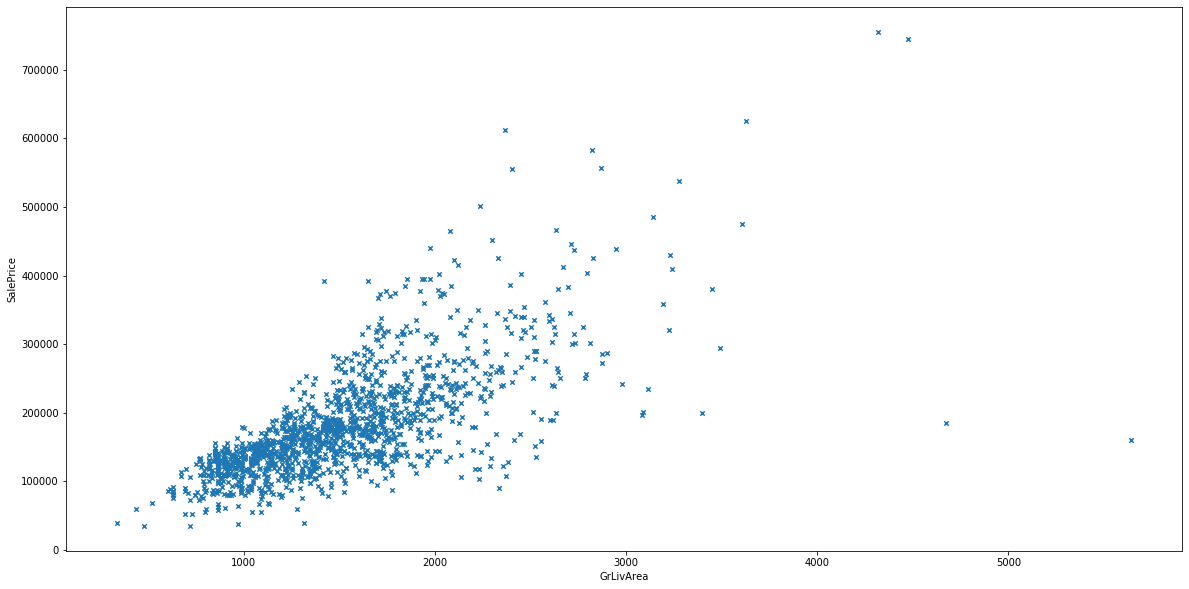

In [17]:
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

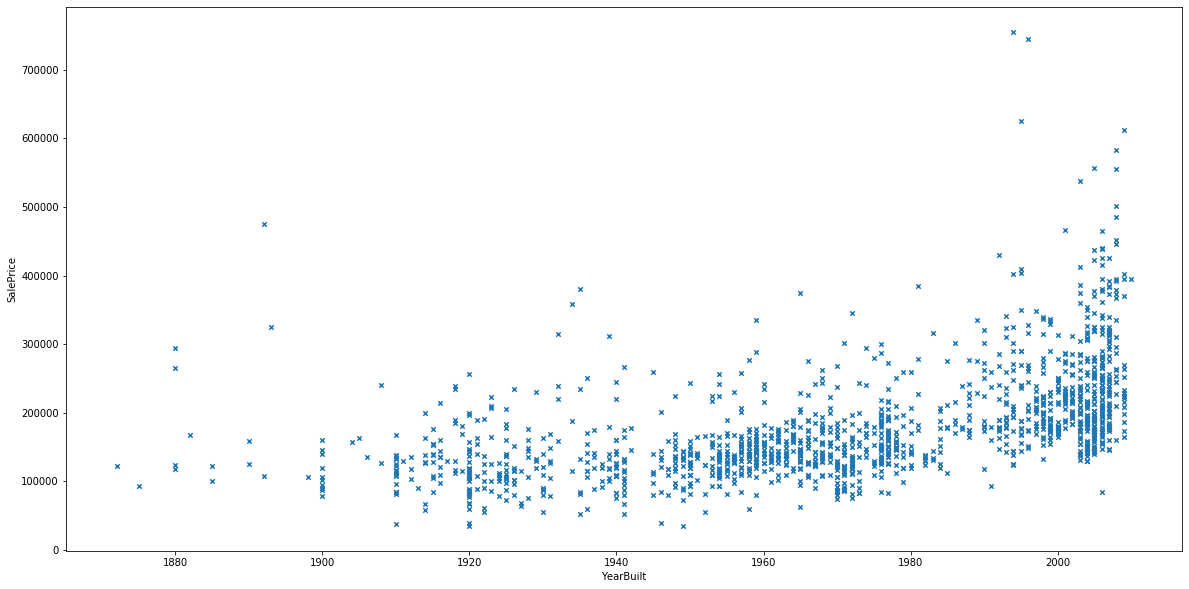

In [18]:
data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

In [21]:
input_x = data[['GrLivArea','YearBuilt']]
output_y = data['SalePrice']
lambda_param = 0.1
aug_x = x_preprocess(input_x) 
    
ml_weights = calculate_map_coefficients(aug_x, output_y, 0, 0) 

sigma_squared = estimate_data_noise(aug_x, output_y, ml_weights) 
print(sigma_squared)    
    
weights = calculate_map_coefficients(aug_x, output_y, lambda_param, sigma_squared) 

print(weights)
    
big_sig = calc_post_cov_mtx(aug_x, sigma_squared, lambda_param)

print(big_sig)

2186703866.3392916
[1.30269779e-02 7.61463982e+01 3.22497911e+01]
[[ 9.99999791e+00 -1.08590728e-03 -4.07900078e-03]
 [-1.08590728e-03  2.95544603e+00 -2.18957015e+00]
 [-4.07900078e-03 -2.18957015e+00  1.99320832e+00]]
